In [141]:
import pandas as pd
corpus=pd.read_csv("C:\\Users\\Vijay Muthyalu\\Music\\covid-19\\corpus.csv",encoding='cp437')
corpus.insert(1,'output',1)

In [142]:
corpus.drop(columns=['Unnamed: 0','last_crawl_date','url','title'],inplace=True)

In [143]:
corpus

,output,body
0,1,NEW DELHI: The Aam Aadmi Party's (AAP's) stanc...
1,1,JapanÆs ties with India do not target any coun...
2,1,SAGITTARIUS NOV 23-DEC 22. ItÆs almost time to...
3,1,Bad corporate news sends stocks lower. Bad new...
4,1,Related. 2008 Batla House encounter convict Sh...
...,...,...
159995,1,"Related. TILL last year,despite his associatio..."
159996,1,Related. Star pacer Dale Steyn feels he is for...
159997,1,"The South African team,especially their formid..."
159998,1,Monk offers to help <U+0091>sexually exploited...


In [144]:
corpus.rename(columns={'body':'text'},inplace=True)

In [145]:
corpus_new=corpus.loc[0:336]

In [146]:
corpus_new

,output,text
0,1,NEW DELHI: The Aam Aadmi Party's (AAP's) stanc...
1,1,JapanÆs ties with India do not target any coun...
2,1,SAGITTARIUS NOV 23-DEC 22. ItÆs almost time to...
3,1,Bad corporate news sends stocks lower. Bad new...
4,1,Related. 2008 Batla House encounter convict Sh...
...,...,...
332,1,People topped all consumer magazines in ad pag...
333,1,Apple CEO Tim Cook speaks about the number of ...
334,1,"Nick Romito is the CEO of View the Space, an o..."
335,1,The Magnificent Mr. Toad has nothing on real e...


In [147]:
article=pd.read_csv("C:\\Users\\Vijay Muthyalu\\Music\\covid-19\\articles.csv")
article.insert(1,'output',0)

In [148]:
article.drop(columns=['author','claps','reading_time','link','title'],inplace=True)

In [149]:
article

,output,text
0,0,"Oh, how the headlines blared:\nChatbots were T..."
1,0,If you’ve ever found yourself looking up the s...
2,0,Machine learning is increasingly moving from h...
3,0,If your understanding of A.I. and Machine Lear...
4,0,Want to learn about applied Artificial Intelli...
...,...,...
332,0,Click here to share this article on LinkedIn »...
333,0,These are my opinions on where deep neural net...
334,0,Everyone who has been remotely tuned in to rec...
335,0,One of the biggest misconceptions around is th...


In [150]:
cor_art=pd.concat([corpus_new,article])

In [151]:
cor_art

,output,text
0,1,NEW DELHI: The Aam Aadmi Party's (AAP's) stanc...
1,1,JapanÆs ties with India do not target any coun...
2,1,SAGITTARIUS NOV 23-DEC 22. ItÆs almost time to...
3,1,Bad corporate news sends stocks lower. Bad new...
4,1,Related. 2008 Batla House encounter convict Sh...
...,...,...
332,0,Click here to share this article on LinkedIn »...
333,0,These are my opinions on where deep neural net...
334,0,Everyone who has been remotely tuned in to rec...
335,0,One of the biggest misconceptions around is th...


In [152]:
from sklearn.utils import shuffle
cor_art=shuffle(cor_art)

In [153]:
y=cor_art['output']
cor_art.drop(columns='output',inplace=True)

In [154]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cor_art,y,test_size=0.3,random_state=9)
X_train

,text
273,With media attention focused on Chris Christie...
228,"by Blaise Agüera y Arcas, Alexander Todorov a..."
256,Make sure to check out the other articles here...
239,ThatÆs been a top Team de Blasio goal since th...
270,But here are the underprivileged pupils of Far...
...,...
127,Facebook has recently launched a limited beta ...
38,"By Naseem Hakim & Aaron Keys\nAt Airbnb, we wa..."
109,MORE FROM. Forbes Media surprised staffers Tue...
106,This post outlines a formalization of what Nic...


In [155]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [156]:
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stemmer=PorterStemmer()


def preprocessing(review):
    
    final_tokens=' '
    tokens=tokenizer.tokenize(review)
    #print('Tokens:',tokens)
    pure_tokens=[token.lower() for token in tokens if token.lower() not in stopwords.words('english')]
    #print('Pure Tokens:',pure_tokens)
    stemmed_tokens=[stemmer.stem(pure_token) for pure_token in pure_tokens]
    
    final_tokens=final_tokens.join(stemmed_tokens)
    
    return final_tokens



preprocessing('I like to explore the world on my favourite car')
X_train['Cleaned_text']=X_train['text'].apply(preprocessing)

C:\Users\Vijay Muthyalu\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [157]:
vectorizer=TfidfVectorizer(stop_words='english',use_idf=True)

vectorizer.fit(X_train['Cleaned_text'])
X_train_TfIdf=vectorizer.transform(X_train['Cleaned_text'])

vectorizer.vocabulary_
X_train_TfIdf.shape

Exception ignored in: <function SeekableUnicodeStreamReader.__del__ at 0x0000022E0409A0D8>
Traceback (most recent call last):
  File "C:\Users\Vijay Muthyalu\Anaconda3\lib\site-packages\nltk\data.py", line 1280, in __del__
    if not self.closed:
  File "C:\Users\Vijay Muthyalu\Anaconda3\lib\site-packages\nltk\data.py", line 1294, in closed
    return self.stream.closed
AttributeError: 'SeekableUnicodeStreamReader' object has no attribute 'stream'


(471, 18973)

In [158]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt


clf = MultinomialNB().fit(X_train_TfIdf.toarray(),y_train)

#clf.score(X_train_TfIdf.toarray(),y_train)


#test_review= 'That product was its absolute best and I loved using every feature of it'
X_test['Cleaned_text']=X_test['text'].apply(preprocessing)

#processed_test_review
X_test_tfIdf=vectorizer.transform(X_test['Cleaned_text'])


C:\Users\Vijay Muthyalu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [159]:
y_pred=clf.predict(X_test_tfIdf.toarray())
compare=pd.DataFrame({'actuals':y_test,'predicts':y_pred})

In [160]:
compare

,actuals,predicts
71,0,0
13,1,1
261,0,0
150,1,1
4,0,0
...,...,...
171,0,0
172,1,1
211,0,0
110,1,1


0.9993145319232276

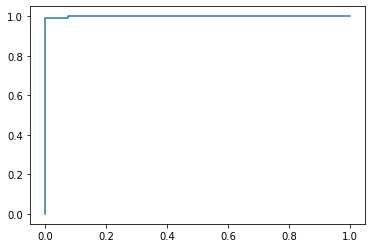

In [161]:
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,recall_score,precision_recall_curve
logit=LogisticRegression()
logit.fit(X_train_TfIdf,y_train)
y_logistic_pred=logit.predict(X_test_tfIdf)

y_logistic_proba_pred=logit.predict_proba(X_test_tfIdf.toarray())[::,1]

log_fpr,log_tpr,log_thresholds=roc_curve(y_test,y_logistic_proba_pred)

plt.plot(log_fpr,log_tpr)

roc_auc_score(y_test,y_logistic_proba_pred)


In [162]:
print(recall_score(y_test,y_logistic_pred))

0.990990990990991
